In [32]:
import numpy as np
import pandas as pd

from sklearn.externals.six import StringIO 

from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

from sklearn.metrics import *
from sklearn.ensemble import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [33]:
wine = load_wine()

In [34]:
wine_x_ds = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

In [35]:
# Проверка на пропуски
wine_x_ds.isnull().sum()

# пропусков нет, категориальный признаков тоже нет - кодировать не надо

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [36]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

### Разделение на обучающую и тестовую выборки

In [37]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine.data, wine.target, 
                                                                        test_size=0.2, random_state=1)
wine_X_train.shape, wine_X_test.shape

((142, 13), (36, 13))

## Random Forest

In [38]:
rfc = RandomForestClassifier(n_estimators=1, max_depth=2, random_state=3).fit(wine_X_train, wine_y_train)
rfc_pred = rfc.predict(wine_X_test)

In [39]:
accuracy_score(wine_y_test, rfc_pred)

0.9444444444444444

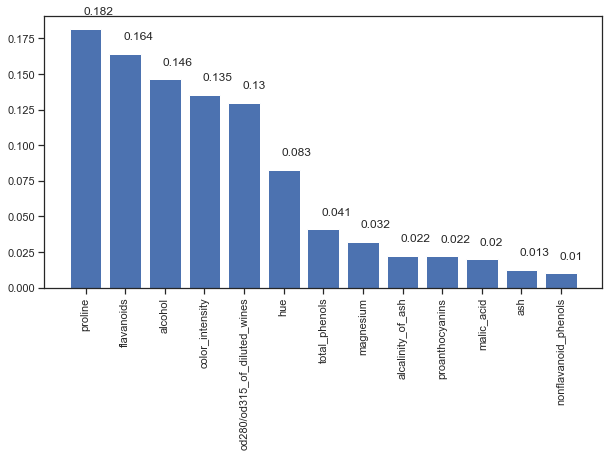

In [40]:
wine_rf_cl = RandomForestClassifier(random_state=1)
wine_rf_cl.fit(wine_x_ds, wine.target)
_, _ = draw_feature_importances(wine_rf_cl, wine_x_ds)

## Ансамблевая модель "Градиентный бустинг"

In [41]:
gb = GradientBoostingClassifier(n_estimators=5, max_depth=2, learning_rate=0.05).fit(wine_X_train, wine_y_train)
gb_pred = gb.predict(wine_X_test)

In [42]:
accuracy_score(wine_y_test, gb_pred)

0.9444444444444444

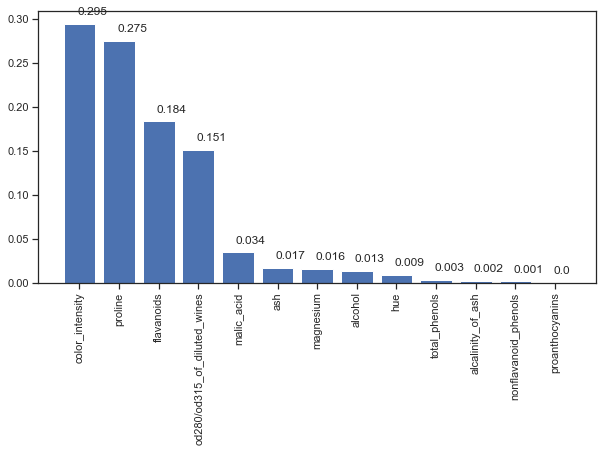

In [43]:
wine_gb_cl = GradientBoostingClassifier(random_state=1)
wine_gb_cl.fit(wine_x_ds, wine.target)
_, _ = draw_feature_importances(wine_gb_cl, wine_x_ds)